## Titanic Project

#### Problem Statement:
     The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
     
#### Attributes:
    
    survival - Survival (0 = No; 1 = Yes) -> Target Variable

    PClass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

    name - Name

    sex - Sex

    age - Age

    sibsp - Number of Siblings/Spouses Aboard

    parch - Number of Parents/Children Aboard

    ticket - Ticket Number

    fare - Passenger Fare

    cabin - Cabin Number

    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)




### STEP 1 : Preparing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [3]:
data= pd.read_csv("titanic_train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data = data.set_index('PassengerId')

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   #### OBSERVATIONS:
       - Count of Age is less, we can see missing values .
       - WE can see min values zero for SibSp/ Parch which can be possible that no sibling / no parents are obboard.
       - Fare min vlaue is zero which is unusual, we can visualize it.
  
  ### Checknig for Missing Values

<AxesSubplot:ylabel='PassengerId'>

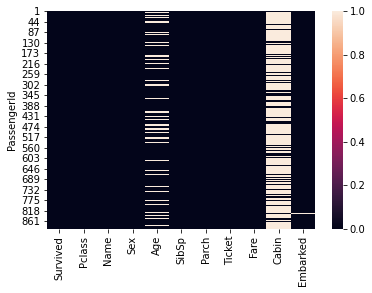

In [7]:
 sb.heatmap(data.isnull())

#### **OBservations:**
    - Cabin Values have 80% of missing values, filling the missing can give rise to inconsistency in the data and can effect the model performance. Dropping the column would be a good approach.
    - Age Missing Values can be filling with help of other columns.

In [8]:
data[data.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


**NO DUPLICATE ROWS**


### STEP 2 : EDA
        2.1 UNIVARIANTE ANALYSIS
        
        
        
   ##### Vizualizing Categorical Features

In [9]:
import warnings 
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '  Survival Classes  ')

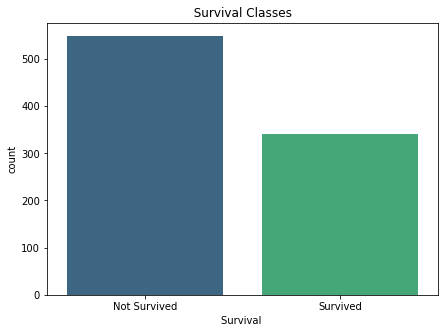

In [10]:
plt.figure(figsize=(7,5))
sb.countplot(data['Survived'], palette='viridis')
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('Survival ')
plt.title('  Survival Classes  ')

**IMBALANCED CLASSES NOTICED which needs oversampling/undersampling**

Text(0.5, 1.0, '  Passenger Classes  ')

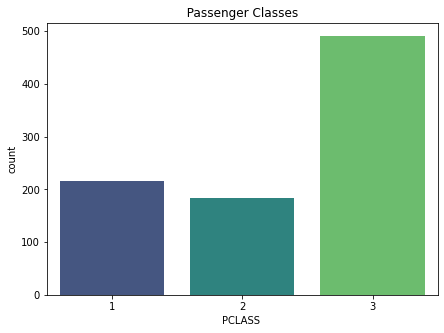

In [11]:
plt.figure(figsize=(7,5))
sb.countplot(data['Pclass'],palette='viridis')
plt.xlabel('PCLASS ')
plt.title('  Passenger Classes  ')

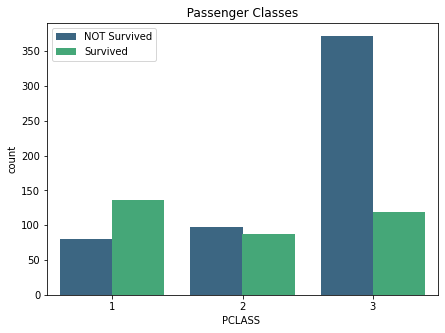

In [12]:
plt.figure(figsize=(7,5))
sb.countplot(data['Pclass'],palette='viridis',hue=data['Survived'])
plt.xlabel('PCLASS ')
plt.title('  Passenger Classes  ')
plt.legend(['NOT Survived','Survived'])

##### OBSERVATIONS:  
    - PCLASS 3 has highest count in the Data.
    - Survival Surval for Class 1 is more than other class.
    - Not Survival Rate is more for Class 3 than other class.

Text(0.5, 1.0, 'Count Plot for SEX')

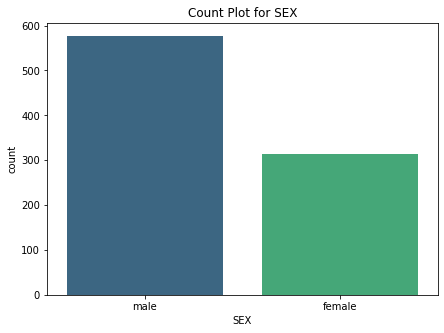

In [13]:
plt.figure(figsize=(7,5))
sb.countplot(data['Sex'], palette='viridis')

plt.xlabel('SEX')

plt.title('Count Plot for SEX')

Text(0.5, 1.0, 'Count Plot for SEX')

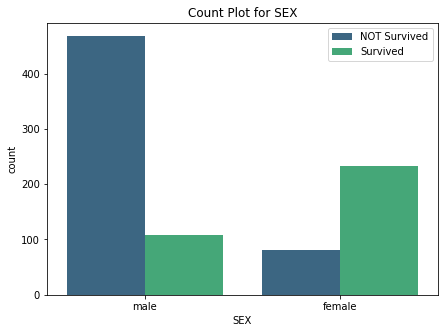

In [14]:
plt.figure(figsize=(7,5))
sb.countplot(data['Sex'], palette='viridis',hue=data['Survived'])
plt.legend(['NOT Survived','Survived'])
plt.xlabel('SEX')
plt.title('Count Plot for SEX')

##### OBSEVATIONS:
        - Male Count is High in PAssengers.
        - Probabilty for Females to Survive is more than male.
        - Probability of Male to not Survive is more than female.

Text(0.5, 1.0, 'Count Plot for Embarkment')

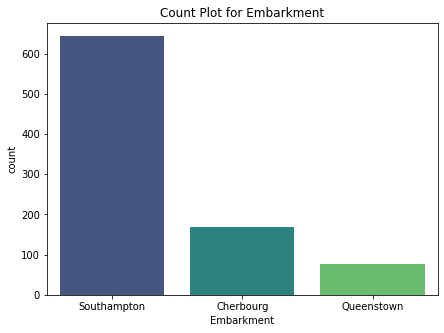

In [15]:
plt.figure(figsize=(7,5))
sb.countplot(data['Embarked'], palette='viridis')
plt.xticks([0,1,2],['Southampton','Cherbourg', 'Queenstown'])
plt.xlabel('Embarkment')
plt.title('Count Plot for Embarkment')

Text(0.5, 1.0, 'Count Plot for Embarkment')

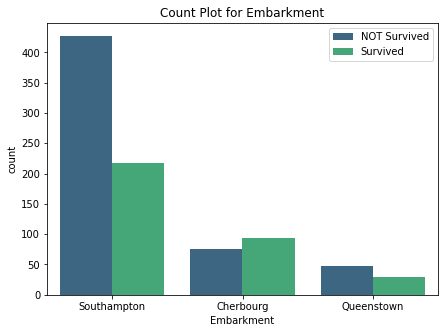

In [16]:
plt.figure(figsize=(7,5))
sb.countplot(data['Embarked'], palette='viridis',hue=data['Survived'])
plt.xticks([0,1,2],['Southampton','Cherbourg', 'Queenstown'])
plt.legend(['NOT Survived','Survived'])
plt.xlabel('Embarkment')
plt.title('Count Plot for Embarkment')

##### OBSERVATIONS:
    - SouthHampton has the highest  in the Embarkment.
    - SouthHampton has highest count for both Survived and Non survived.
    - Probabilty of embarkment for SouthHamptons is higher w.r.t to both survived/ not survived.
    - Probability of Survival for Cherbourg/ Queenstown is close to not surviving.

Text(0.5, 1.0, 'No of Siblings/ Spouses Onboard')

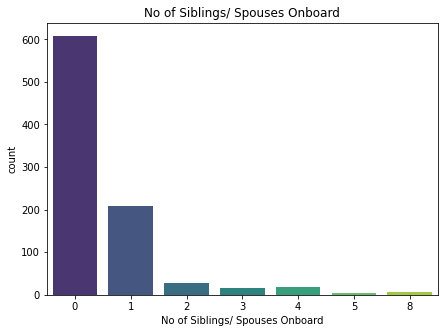

In [17]:
plt.figure(figsize=(7,5))
sb.countplot(data['SibSp'], palette='viridis')

plt.xlabel('No of Siblings/ Spouses Onboard')
plt.title('No of Siblings/ Spouses Onboard')

Text(0.5, 1.0, 'No of Siblings/ Spouses Onboard')

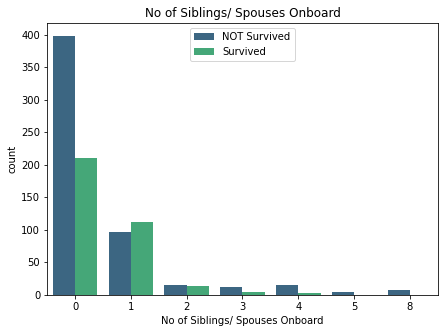

In [18]:
plt.figure(figsize=(7,5))
sb.countplot(data['SibSp'], palette='viridis',hue=data['Survived'])
plt.legend(['NOT Survived','Survived'])
plt.xlabel('No of Siblings/ Spouses Onboard')
plt.title('No of Siblings/ Spouses Onboard')

##### OBSERVATIONS:
    - For No Siblings/spouses, probability of survival is less.
    - For Siblings category 1+ have equal probability of surviving and not surviving.

Text(0.5, 1.0, 'No of Parents / Children Onboard')

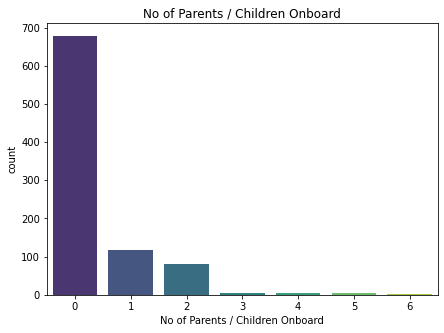

In [19]:
plt.figure(figsize=(7,5))
sb.countplot(data['Parch'], palette='viridis')

plt.xlabel('No of Parents / Children Onboard')
plt.title('No of Parents / Children Onboard')

Text(0.5, 1.0, 'No of Parents/ Children Onboard')

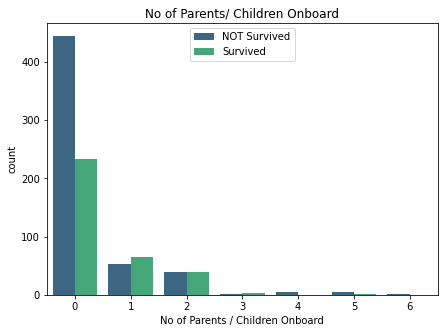

In [20]:
plt.figure(figsize=(7,5))
sb.countplot(data['Parch'], palette='viridis',hue=data['Survived'])
plt.legend(['NOT Survived','Survived'])
plt.xlabel('No of Parents / Children Onboard')
plt.title('No of Parents/ Children Onboard')

##### Observations:
        - WE observe that most of the passengers were indiviuals having 0 siblings/ spouses or 0 parents/children
        - Probabilty of Not surviving is more For 0 number of parents /childrens .
        - For 1+ no of parents/ childrens , probabilty of survival and not surviving is equal.
        - For large of Childrens non survival rate is high.
       

##### Visualizing distribution plots for Continous Plots

In [21]:
col = ['Age','Fare']

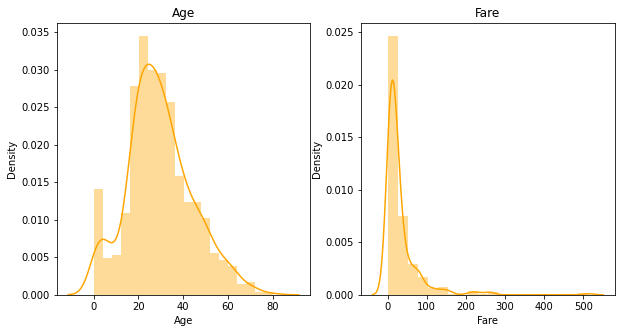

In [22]:
plt.figure(figsize=(10,5))
c = 1
for i in col:
    plt.subplot(1,2,c)
    sb.distplot(data[i],bins=20,color='orange')
    plt.title(i)
    c=c+1
    
    

##### OBSERVATIONS: 
    - Age has a normal distribution, Fare is Left Skewed.
    
    
#### BOXPLOTS FOR CONTINUOUS VARIABles

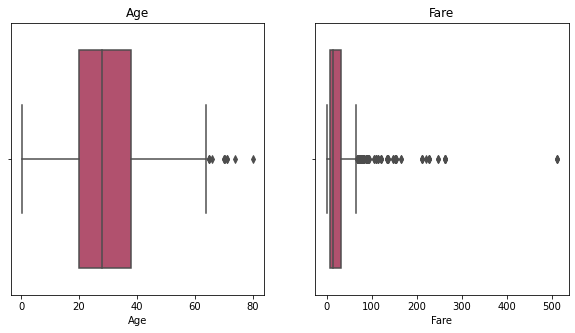

In [23]:
plt.figure(figsize=(10,5))
c = 1
for i in col:
    plt.subplot(1,2,c)
    sb.boxplot(data[i],palette='flare')
    plt.title(i)
    c=c+1
    

##### OBSERVATIONS
        - Age have some Outliers, Fare has some outliers and 50% of vlaues lie between 0-15.

#### 2.2 BIVARIANTE ANALYSIS

    - Analyzing Features with target Variable AnD Between Features.

([<matplotlib.axis.XTick at 0x2d221ff9c70>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

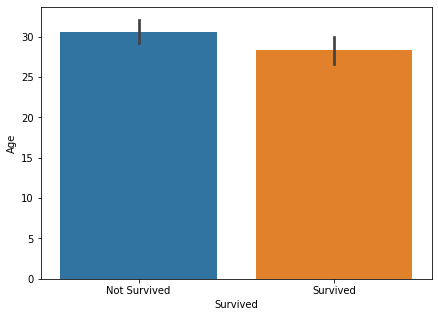

In [24]:
plt.figure(figsize=(7,5))
sb.barplot(data['Survived'],data['Age'])
plt.xticks([0,1],['Not Survived','Survived'])

([<matplotlib.axis.XTick at 0x2d221fe5dc0>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

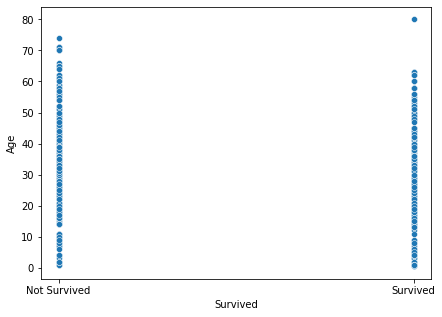

In [25]:
plt.figure(figsize=(7,5))
sb.scatterplot(data['Survived'],data['Age'])
plt.xticks([0,1],['Not Survived','Survived'])

##### OBSERVATIONS: 
    - Average Age of Survived Passengers and Not Survived Passengers are Close. having less influence on predicting Target.
    - But Not Survived Average age is higher than Average Survived Age.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

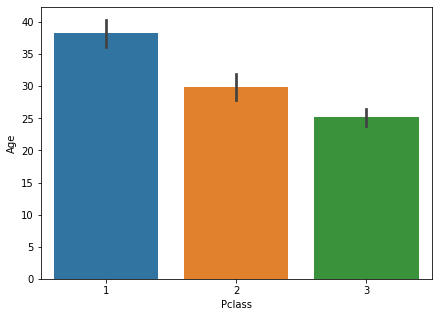

In [26]:
plt.figure(figsize=(7,5))
sb.barplot(data['Pclass'],data['Age'])


#### OBSERVATION 
    - AS PCLASS has different avgerage age, And see correlation between Age and Pclass. WE can Fill missing Values of Age with help of Average age as per class.

([<matplotlib.axis.XTick at 0x2d221def370>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

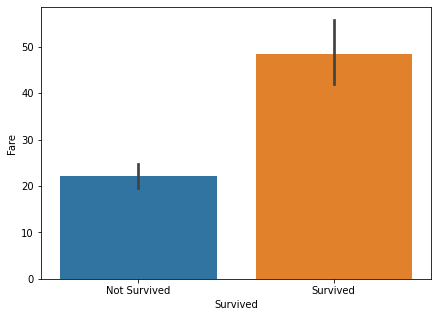

In [27]:
plt.figure(figsize=(7,5))
sb.barplot(data['Survived'],data['Fare'])
plt.xticks([0,1],['Not Survived','Survived'])

([<matplotlib.axis.XTick at 0x2d221e56df0>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

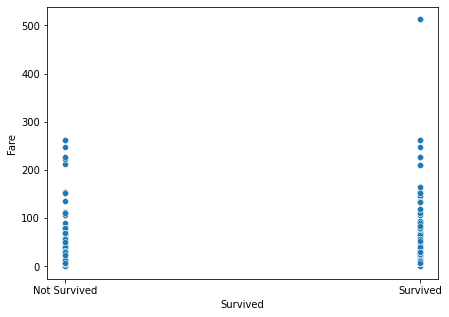

In [28]:
plt.figure(figsize=(7,5))
sb.scatterplot(data['Survived'],data['Fare'])
plt.xticks([0,1],['Not Survived','Survived'])

##### OBSERVATIONS:
    - Average Fare for survived passenger Are higher than Average Non survived Passenger.
    - Non Survived Passegers more have fare range lower than Survived Fare Range.

Text(0.5, 1.0, 'PClass VS Fare')

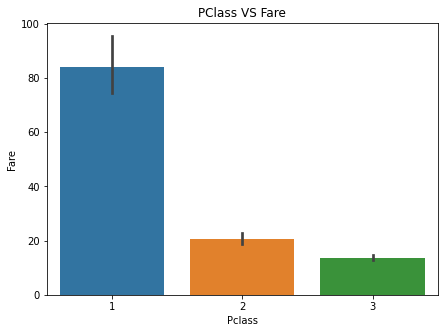

In [29]:
plt.figure(figsize=(7,5))
sb.barplot(data['Pclass'],data['Fare'])
plt.title('PClass VS Fare')

Text(0.5, 1.0, 'PClass VS Fare')

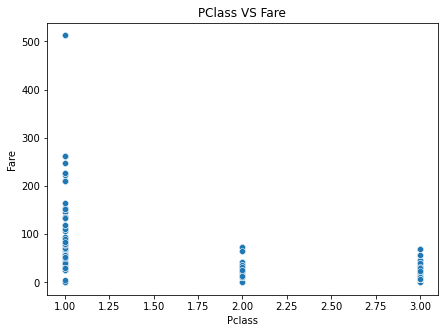

In [30]:
plt.figure(figsize=(7,5))
sb.scatterplot(data['Pclass'],data['Fare'])
plt.title('PClass VS Fare')

#### OBservations:
        - Class 3  has the Highest Fare Amount. 
        - Class 3 has lowest Fare .
        - AS we have seen before Survived Passengers having high Avgerage Fare can say Class 1 survived more as they have higher Fare.

Text(0.5, 1.0, 'Sex VS Fare')

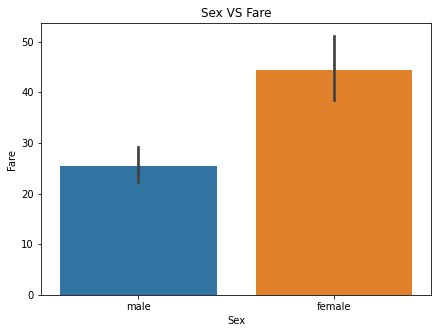

In [31]:
plt.figure(figsize=(7,5))
sb.barplot(data['Sex'],data['Fare'])
plt.title('Sex VS Fare')

Text(0.5, 1.0, 'SEX VS Fare')

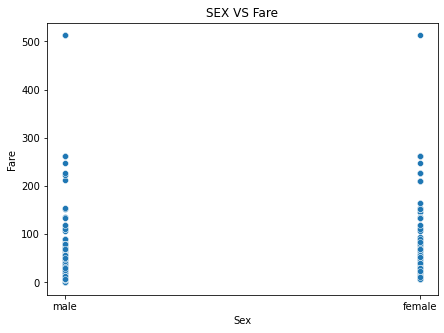

In [32]:
plt.figure(figsize=(7,5))
sb.scatterplot(data['Sex'],data['Fare'])
plt.title('SEX VS Fare')

#### OBSERVATIONS:
        - Average Fare Price of Females is higher than Males.
        

Text(0.5, 1.0, 'SURVival Rate Vs PCLASS')

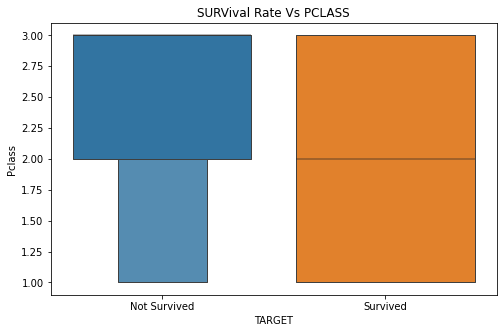

In [33]:
plt.figure(figsize=(8,5))
sb.boxenplot(data['Survived'],data['Pclass'])
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('TARGET')
plt.title('SURVival Rate Vs PCLASS')

##### OBSERVATIONS:
    - We can Say probability of Survival for Class 1 is more than Other classes.
    - Survived Passengers are More in Class 1 than Non Survived Passengers.
    - Non Survived PAssengers are more in CLass 2,3.
    

Text(0.5, 1.0, 'SURVival Rate Vs No of Parents/Children')

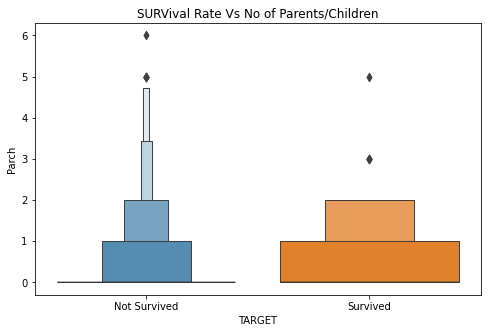

In [34]:
plt.figure(figsize=(8,5))
sb.boxenplot(data['Survived'],data['Parch'])
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('TARGET')
plt.title('SURVival Rate Vs No of Parents/Children')

Text(0.5, 1.0, 'SURVival Rate Vs No of Siblings/Spouses')

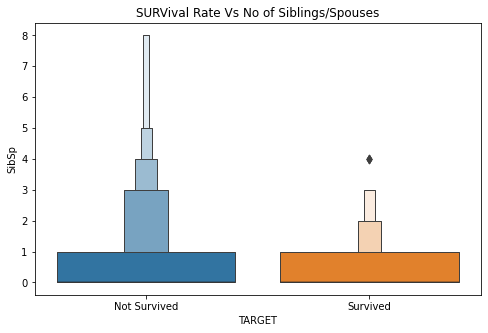

In [35]:
plt.figure(figsize=(8,5))
sb.boxenplot(data['Survived'],data['SibSp'])
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('TARGET')
plt.title('SURVival Rate Vs No of Siblings/Spouses')

##### OBSERVATION
        -  For Survival, no of siblings/spouses are in range of 0-4
        - For non surviving , no of sibling / spouse are  from 0-8.
        - For Survival, no of parents/children are from range 0-2.
        - For non survinig, no of parents/ children are from range 0-5.
        
**WE can Say, if Sibling are more than 4, passenger is likely to not Survive.**
        
**WE can  Say, If No of Parents/ Children is more than 2, passengers is likely to not Surviving.**

Text(0.5, 1.0, 'SURVival Rate Vs Embarkment')

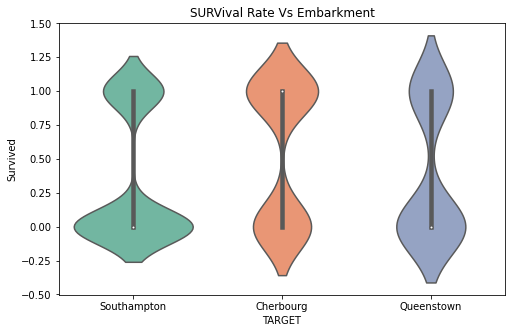

In [36]:
plt.figure(figsize=(8,5))
sb.violinplot(data['Embarked'],data['Survived'],palette='Set2')
plt.xticks([0,1,2],['Southampton','Cherbourg', 'Queenstown'])
plt.xlabel('TARGET')
plt.title('SURVival Rate Vs Embarkment')

### OBservations:
    - HIGH Survival Rate for SoutHamptons.
    - Cherbourg anf Queenstown have equal probabilty for surviving and not surving.

#### 2.3 MULTIVARIANTE ANALYSIS 

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
encoder = LabelEncoder()

In [40]:
data['Sex'] = encoder.fit_transform(data['Sex'])
# female = 0, male = 1

In [41]:
data['Embarked'] = encoder.fit_transform(data['Embarked'])
# S = 2, C = 0   ,Q=1

         Dropping  Name,Ticket,Cabin as Name, Ticket is unqie for each passenger and might not give any valuable information.And, Cabin hAS 80% MISSING VLAUES.

In [42]:
data.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


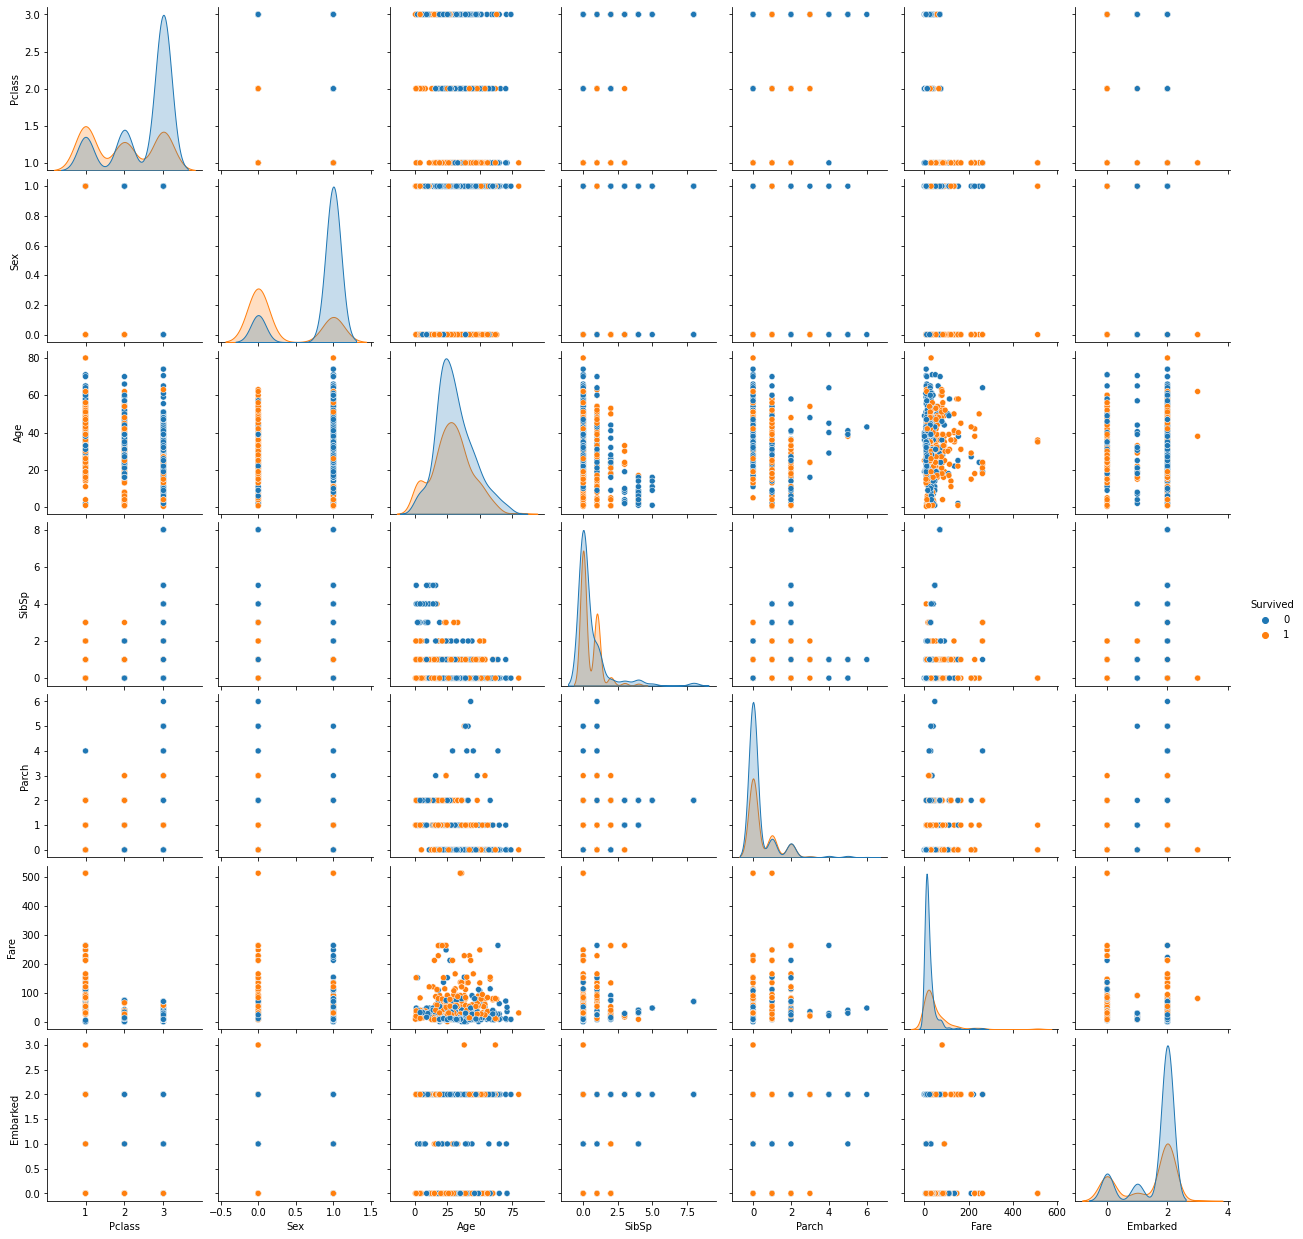

In [44]:
sb.pairplot(data,hue='Survived')

<AxesSubplot:>

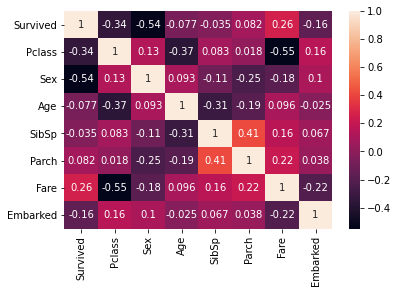

In [45]:
sb.heatmap(data.corr(),annot=True)

<AxesSubplot:>

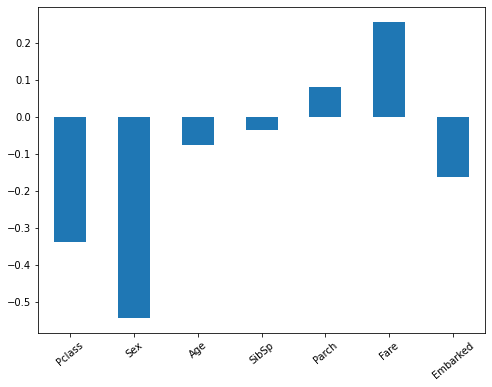

In [46]:
plt.figure(figsize=(8,6))
corr=data.drop("Survived",axis=1).corrwith(data["Survived"])
corr.plot(kind="bar",rot=40)

#### OBSERVATIONS:
        - Most Correlation with Sex,Fare, eMBARKED, pclASS
        - Target Class/ Survival Rate has high Negative/ Positve correlatio with Pclass,Sex,Fare.\
        - Features SibSp and Parch are correlated, we can drop on of these columns as they give similar knid of information.
        - Pclass and Fare have negative Correlation as we have analyzed in bivariaTe analysis.
        - Age and Pclass  show correlated, so for fact we can use Pclass to fill missing vlaues accurately.

#### STEP 3 : PREPROCESSING THE DATA
    - Filling Missing Vales
    - Outlier Detection/ Treatment with Zscore method.
    - Feature Engineering with PCA and Manually.
    - Skewness Check and Scaling the Data.

###### FILLING MISSING VLAUES  of Age w.r.t to Class they belong

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

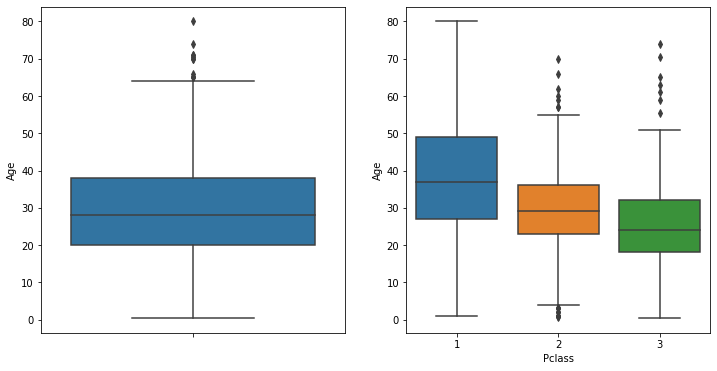

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.boxplot(y='Age',data=data)
plt.subplot(1,2,2)
sb.boxplot(x='Pclass',y='Age',data=data)


In [48]:
d = data[['Age','Pclass']]
d.groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [49]:

def fill_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass==1:
            return 38.23
        elif pclass ==2:
            return 29.87
        else:
            return 25.14
    else:
        return Age
data['Age'] = data[['Age','Pclass']].apply(fill_age,axis=1)
data['Age'] = data[['Age','Pclass']].apply(fill_age,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 95.7 KB


<AxesSubplot:ylabel='PassengerId'>

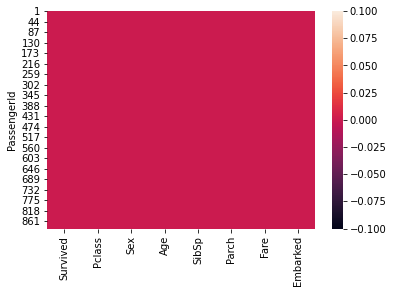

In [50]:
sb.heatmap(data.isnull())

###### OUTLIER DETECTION

In [51]:
data.reset_index()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.00,1,0,7.2500,2
1,2,1,1,0,38.00,1,0,71.2833,0
2,3,1,3,0,26.00,0,0,7.9250,2
3,4,1,1,0,35.00,1,0,53.1000,2
4,5,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00,0,0,13.0000,2
887,888,1,1,0,19.00,0,0,30.0000,2
888,889,0,3,0,25.14,1,2,23.4500,2
889,890,1,1,1,26.00,0,0,30.0000,0


In [52]:
from scipy.stats import zscore

In [53]:
new_data = data

In [54]:
new_data.shape

(891, 8)

In [55]:
scores = np.abs(zscore(new_data))

In [56]:
np.where(scores>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [57]:
new_data = new_data[(scores<3).all(axis=1)]

In [58]:
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,2
2,1,1,0,38.00,1,0,71.2833,0
3,1,3,0,26.00,0,0,7.9250,2
4,1,1,0,35.00,1,0,53.1000,2
5,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,13.0000,2
888,1,1,0,19.00,0,0,30.0000,2
889,0,3,0,25.14,1,2,23.4500,2


**7.9% DATALOSS Noticed**

###### Checking Skewness in Continous Variables

In [59]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.509606
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

In [60]:
new_data.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.406240
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

In [64]:
from sklearn.preprocessing import PowerTransformer

In [65]:
y = new_data['Survived']
new_data.drop('Survived',inplace=True,axis=1)

In [66]:
power = PowerTransformer()

In [67]:
data1 = new_data

In [68]:
features = power.fit_transform(data1)

In [69]:
transformed_data = pd.DataFrame(features,columns=data1.columns)

In [70]:
transformed_data.skew()

Pclass     -0.429718
Sex        -0.664152
Age         0.065813
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -0.850621
dtype: float64

**SKEWNESS REMOVED**


#### STEP 4 : FEATURE ENGINEERING 

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()

In [73]:
y = y.values.reshape(-1,1)

In [74]:
pca.fit(transformed_data,y)

PCA()

In [75]:
pca.explained_variance_ratio_

array([0.31504416, 0.2213904 , 0.14397232, 0.11323935, 0.09361537,
       0.07561395, 0.03712445])

<BarContainer object of 7 artists>

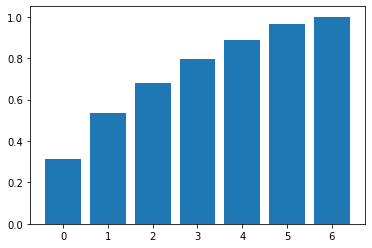

In [76]:
plt.bar(range(0,7),np.cumsum(pca.explained_variance_ratio_))

#### STEP 5: MODELLING THE DATA

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE()

In [79]:
x_over,y_over= smote.fit_resample(transformed_data,y)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

In [81]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
randomstate = 0
max_score = 0
lr = LogisticRegression()
for i in range(1,46):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = accuracy_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Random State= 22  and R2 Score of LR MODEL :  83.66666666666667


In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.27,random_state=randomstate)
    

        - CHOOSEN RANDOM STATE IS 35

### 5.1 Logistic Regression

In [84]:
roc_scores = []
cv_scores = []
accuracy_scores = []

---------Logistic Regression-----------
Accuracy Score :  0.837037037037037
Roc Auc Score :  0.8892394644424935
CV SCORE / TRAINING SCORE:  0.8549100000000001
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       136
           1       0.83      0.84      0.84       134

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270

Confusion matrix
[[113  23]
 [ 21 113]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

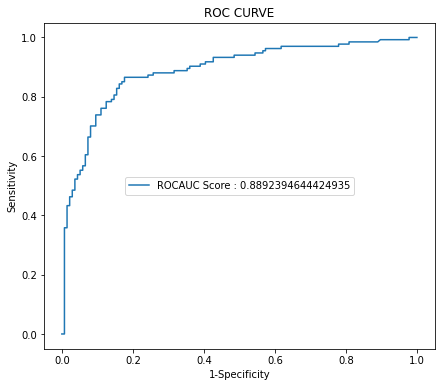

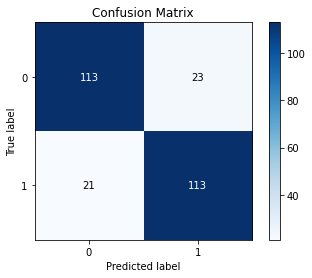

In [85]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
prediction_lr = logistic.predict(x_test)
pred_proba_lr = logistic.predict_proba(x_test)[:,1]
print('---------Logistic Regression-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(logistic,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(logistic,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)




### 5.2 SVC 

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
params = {
    'kernel' : ['liner','rbf'], 'C': [1,10,100,.1], 'gamma': [1,.1,.01,.001]
}

In [88]:
svc = SVC(probability=True)
grid = GridSearchCV(svc,params,cv=5,scoring='roc_auc')

In [89]:
grid.fit(transformed_data,y)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 0.1], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['liner', 'rbf']},
             scoring='roc_auc')

In [90]:
grid.best_estimator_

SVC(C=1, gamma=0.1, probability=True)

---------SVC MODEL-----------
Accuracy Score :  0.8222222222222222
Roc Auc Score :  0.9086643985952589
CV SCORE / TRAINING SCORE:  0.8648900000000002
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       136
           1       0.84      0.79      0.82       134

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.82      0.82      0.82       270

Confusion matrix
[[116  20]
 [ 28 106]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

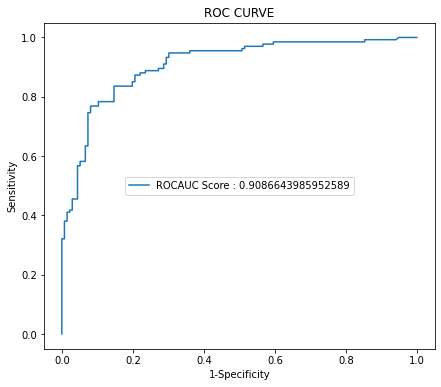

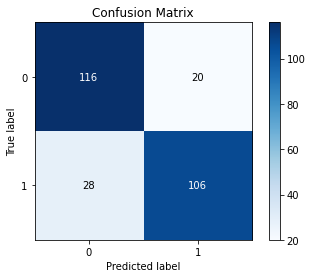

In [91]:
svc = SVC(probability=True,C=1,gamma=.1)
svc.fit(x_train,y_train)
prediction_lr = svc.predict(x_test)
pred_proba_lr = svc.predict_proba(x_test)[:,1]
print('---------SVC MODEL-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(svc,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(svc,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





# 5.3 KNN 

In [92]:
err = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    err.append(np.mean(pred!=y_test))

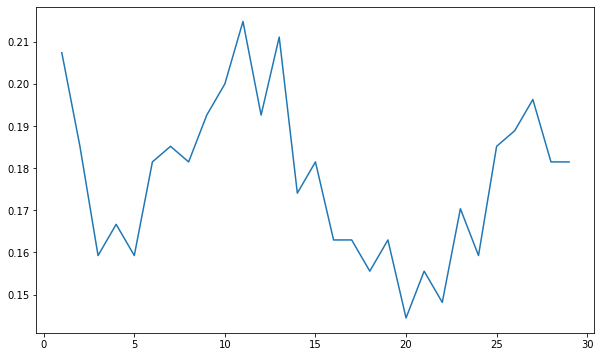

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),err)

---------KNeighborsClassifier-----------
Accuracy Score :  0.8444444444444444
Roc Auc Score :  0.9058658911325725
CV SCORE / TRAINING SCORE:  0.86324
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       136
           1       0.82      0.87      0.85       134

    accuracy                           0.84       270
   macro avg       0.85      0.84      0.84       270
weighted avg       0.85      0.84      0.84       270

Confusion matrix
[[111  25]
 [ 17 117]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

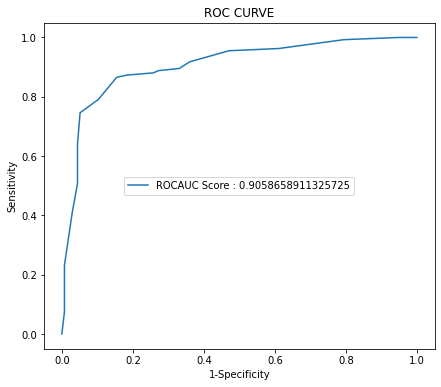

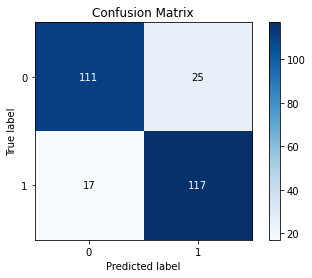

In [94]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
prediction_lr = knn.predict(x_test)
pred_proba_lr = knn.predict_proba(x_test)[:,1]
print('---------KNeighborsClassifier-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(knn,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(knn,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





## 5.4 DECision Tree Classifier

---------Decision Tree classifier-----------
Accuracy Score :  0.8185185185185185
Roc Auc Score :  0.8158472344161545
CV SCORE / TRAINING SCORE:  0.79208
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       136
           1       0.79      0.87      0.83       134

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.82      0.82      0.82       270

Confusion matrix
[[105  31]
 [ 18 116]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

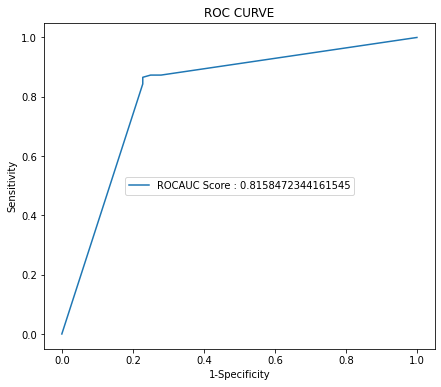

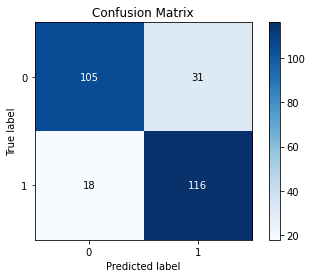

In [95]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
prediction_lr = dtc.predict(x_test)
pred_proba_lr = dtc.predict_proba(x_test)[:,1]
print('---------Decision Tree classifier-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(dtc,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(dtc,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





## 5.5 Random Forest Classifer

In [96]:
rf = RandomForestClassifier()
params = {'n_estimators': [50,100,60,70,110,130,150,200],
        'max_depth' : [2,4,7],
          'max_leaf_nodes' : [1, 5, 10, 20, 50, 100]
         }
grid = GridSearchCV(rf,params,cv=5,scoring='roc_auc')

In [97]:
grid.fit(transformed_data,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 7],
                         'max_leaf_nodes': [1, 5, 10, 20, 50, 100],
                         'n_estimators': [50, 100, 60, 70, 110, 130, 150, 200]},
             scoring='roc_auc')

In [98]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_leaf_nodes=100, n_estimators=150)

---------Random Forest Classifer-----------
Accuracy Score :  0.8666666666666667
Roc Auc Score :  0.9352776558384548
CV SCORE / TRAINING SCORE:  0.8930199999999999
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       136
           1       0.85      0.90      0.87       134

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270

Confusion matrix
[[114  22]
 [ 14 120]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

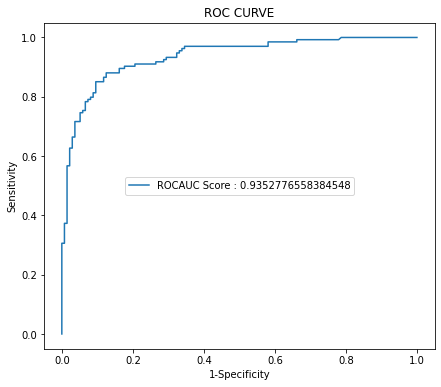

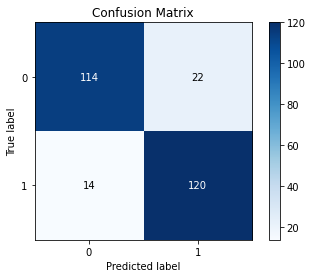

In [99]:
rf = RandomForestClassifier(max_depth=7, max_leaf_nodes=100, n_estimators=150)
rf.fit(x_train,y_train)
prediction_lr = rf.predict(x_test)
pred_proba_lr = rf.predict_proba(x_test)[:,1]
print('---------Random Forest Classifer-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(rf,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(rf,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





### 5.6 Gradient boosting Classifer

---------Gradient Boosting Classifier-----------
Accuracy Score :  0.8629629629629629
Roc Auc Score :  0.9269095697980686
CV SCORE / TRAINING SCORE:  0.8958
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       136
           1       0.85      0.88      0.86       134

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

Confusion matrix
[[115  21]
 [ 16 118]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

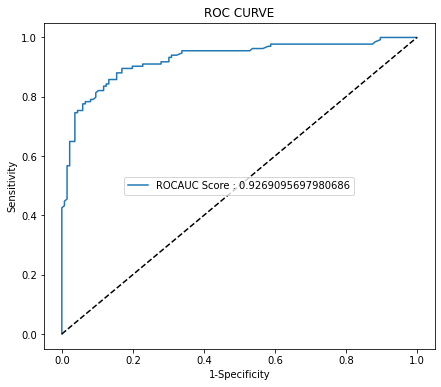

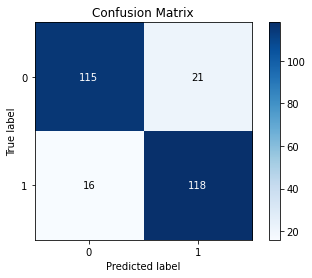

In [100]:
gradient =GradientBoostingClassifier(n_estimators=100)
gradient.fit(x_train,y_train)
prediction_lr = gradient.predict(x_test)
pred_proba_lr = gradient.predict_proba(x_test)[:,1]
print('---------Gradient Boosting Classifier-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(gradient,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(gradient,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





In [101]:
error = []
for i in range(0,6):
    error.append(np.abs(roc_scores[i] - cv_scores[i]))
    

In [102]:
tab = {
    'Accracy Score': accuracy_scores, 
    'ROC AUC SCORE': roc_scores,
    'CV Score': cv_scores, 
    'Error Difference': error
}

In [103]:
table = pd.DataFrame(tab,index=['LOG REG','SVC','KNN','DTC','RF','GBC'])

In [104]:
table

,Accracy Score,ROC AUC SCORE,CV Score,Error Difference
LOG REG,0.837037,0.889239,0.85491,0.034329
SVC,0.822222,0.908664,0.86489,0.043774
KNN,0.844444,0.905866,0.86324,0.042626
DTC,0.818519,0.815847,0.79126,0.024587
RF,0.866667,0.935278,0.89315,0.042128
GBC,0.862963,0.926910,0.89602,0.030890


### AS error/ Bias-variass is in same range for all the models ,we choose model with highest level of metrics ROC AUC SCORE whixh means probability of the passenger to survive highest for RF MODEL

 ### STEP 6 : HYPER TUNING RF MODEL

In [105]:
rf = RandomForestClassifier()
params = {'n_estimators': [50,100,130,150],
        'max_depth' : [2,4,7],
          'max_leaf_nodes' : [ 50, 100], 
          'bootstrap': [True,False],
          'max_features': ['auto','sqrt']
         }
grid = GridSearchCV(rf,params,cv=5,scoring='roc_auc')

In [106]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 7],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [50, 100],
                         'n_estimators': [50, 100, 130, 150]},
             scoring='roc_auc')

In [107]:
 grid.best_estimator_

RandomForestClassifier(max_depth=7, max_leaf_nodes=50, n_estimators=50)

### EVALUATING THE MODEL

---------Random Forest Classifier-----------
Accuracy Score :  0.8666666666666667
Roc Auc Score :  0.9317658033362599
CV SCORE / TRAINING SCORE:  0.89261
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       136
           1       0.84      0.90      0.87       134

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270

Confusion matrix
[[113  23]
 [ 13 121]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

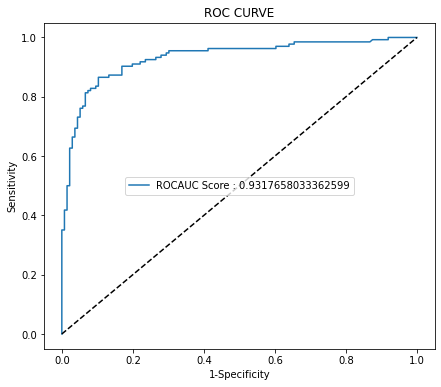

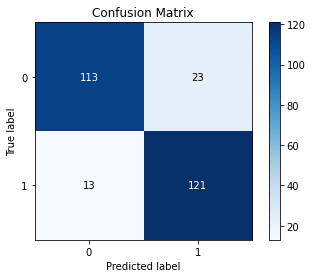

In [108]:
randomForest =RandomForestClassifier(max_depth=7, max_leaf_nodes=50)
randomForest.fit(x_train,y_train)
prediction_lr = randomForest.predict(x_test)
pred_proba_lr = randomForest.predict_proba(x_test)[:,1]
print('---------Random Forest Classifier-----------')
print('Accuracy Score : ',accuracy_score(y_test,prediction_lr))
print('Roc Auc Score : ',roc_auc_score(y_test,pred_proba_lr))
print('CV SCORE / TRAINING SCORE: ',np.mean(cross_val_score(randomForest,x_over,y_over,cv=5,scoring='roc_auc')))
print(classification_report(y_test,prediction_lr))


roc_scores.append(roc_auc_score(y_test,pred_proba_lr))
accuracy_scores.append( accuracy_score(y_test,prediction_lr))
cv_scores.append(np.mean(cross_val_score(randomForest,x_over,y_over,cv=5,scoring='roc_auc')) )


fpr,tpr,threshold = roc_curve(y_test,pred_proba_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC CURVE')
leg = 'ROCAUC Score : '+ str(roc_auc_score(y_test,pred_proba_lr))
plt.legend([leg],loc=10)



print('Confusion matrix')
print(confusion_matrix(y_test,prediction_lr))
skplt.metrics.plot_confusion_matrix(y_test,prediction_lr)





#### SAVE THE MODEL

In [110]:
import joblib as jb

In [111]:
jb.dump(randomForest,'titanic_rf.pk1')

['titanic_rf.pk1']

In [113]:
jb.load('titanic_rf.pk1')

RandomForestClassifier(max_depth=7, max_leaf_nodes=50)

#### CONCLUSION: 

    --The Titanic Survival has highest accuracy with RandomForest Modelwith 93% roc_acc metrics.--